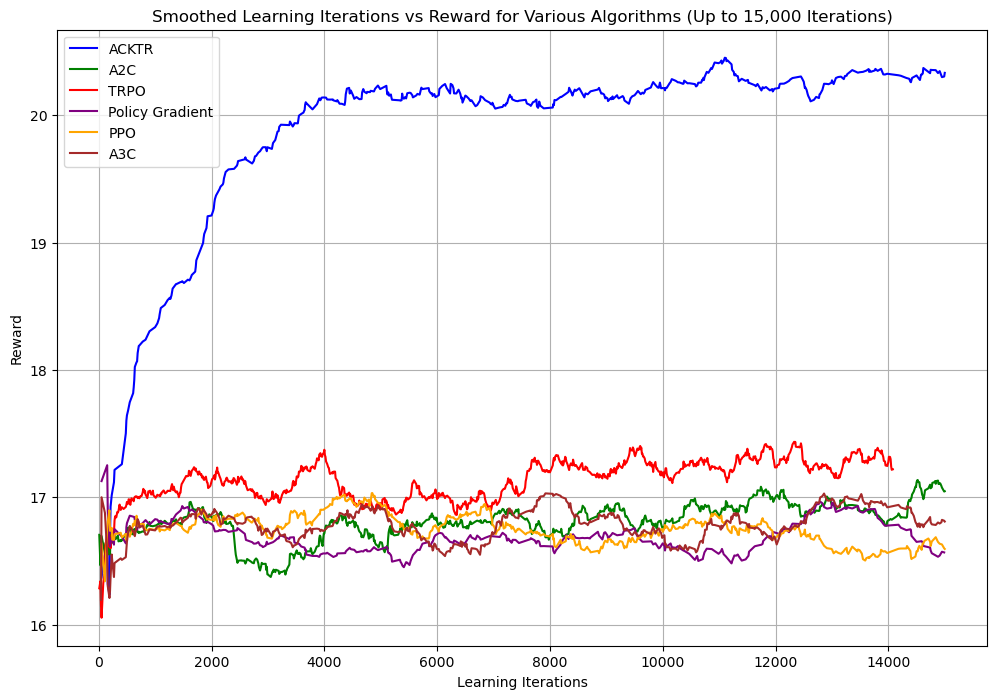

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  # 이동 평균을 계산하기 위해 numpy 추가

# 파일 경로 설정
file_paths = [
    "PCT-041_acktr-2024.04.19-09-19-53.csv",
    "PCT-0417_a2c_modelcompare_0215-2024.04.18-00-01-31.csv",
    "PCT-0417_trpo_modelcompare_0730-2024.04.18-10-38-37.csv",
    "PCT-0418_policy_gradient-2024.04.18-19-13-25.csv",
    "PCT-0418_ppo-2024.04.18-01-08-28.csv",
    "PCT-0418_a3c-2024.04.18-10-35-35.csv"
]

# 알고리즘 이름 및 색상 설정
algorithms = ["ACKTR", "A2C", "TRPO", "Policy Gradient", "PPO", "A3C"]
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

# 이동 평균의 윈도우 크기 설정
window_size = 50

# 그래프 초기화
plt.figure(figsize=(12, 8))

# 데이터 로드 및 플롯
for file_path, algorithm, color in zip(file_paths, algorithms, colors):
    data = pd.read_csv(file_path)
    filtered_data = data[data['Step'] <= 15000]  # Step 값이 15000 이하인 데이터만 필터링

    # 이동 평균 계산
    if len(filtered_data) >= window_size:  # 데이터 길이가 윈도우 크기보다 클 경우에만 계산
        smoothed_values = filtered_data['Value'].rolling(window=window_size, min_periods=1).mean()
        plt.plot(filtered_data['Step'], smoothed_values, label=algorithm, color=color)
    else:
        plt.plot(filtered_data['Step'], filtered_data['Value'], label=algorithm, color=color)

# 제목과 범례
plt.title('Smoothed Learning Iterations vs Reward for Various Algorithms (Up to 15,000 Iterations)')
plt.xlabel('Learning Iterations')
plt.ylabel('Reward')
plt.legend()

# 그리드 추가
plt.grid(True)

# 그래프 표시
plt.show()